# LASSO Regression In-Class Exercise

In this exercise, we will see how to use LASSO for pitch detection and noise removal in audio.

We load the following packages.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load the Data

The data is taken from a sample of about 20 ms of audio from a viola.  I have already pre-processed the data.  You can load it with the following command.  The value `t` is the time (in seconds) and `y` is the sample of audio (this is a mono recording).  Noise has been artificially added to the sample.

In [15]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


Plot the data `y` vs. `t`.  

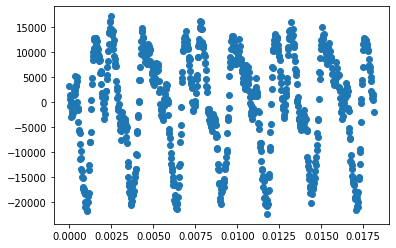

In [16]:
# TODO

plt.plot(t,y, 'o')

## Creating Features for a Sinusoidal Model

We will try to fit a model of the form:

    y[i] = \sum_j a[j]*sin(2*pi*freq[j]*t[i]) + b[j]*cos(2*pi*freq[j]*t[i])

That is, `y[i]` is a sum of sinusoids.  This is a common model for audio signals since an instrument, such as a viola, produces discrete tones.  

This model is non-linear in the frequency parameters.  So, instead of trying to find the frequencies, we will fix a large number of frequencies and then require that the coefficients `a[j]` and `b[j]` are mostly sparse.  

We will use the following vector of frequencies.  This vector includes frequencies on the muscial scale as well as frequencies between the musical notes.

In [17]:
freq = 55*2**(np.arange(5*96)/96)
freq

array([  55.        ,   55.39855267,   55.79999342,   56.20434318,
         56.61162302,   57.02185417,   57.43505803,   57.85125614,
         58.27047019,   58.69272204,   59.1180337 ,   59.54642734,
         59.9779253 ,   60.41255007,   60.85032431,   61.29127084,
         61.73541266,   62.18277291,   62.63337491,   63.08724217,
         63.54439833,   64.00486723,   64.46867289,   64.93583946,
         65.40639133,   65.880353  ,   66.35774919,   66.8386048 ,
         67.32294488,   67.81079469,   68.30217966,   68.79712541,
         69.29565774,   69.79780265,   70.3035863 ,   70.81303506,
         71.32617551,   71.84303438,   72.36363862,   72.88801537,
         73.41619198,   73.94819597,   74.48405508,   75.02379725,
         75.56745061,   76.11504351,   76.66660449,   77.22216231,
         77.78174593,   78.34538453,   78.91310748,   79.48494438,
         80.06092506,   80.64107952,   81.22543803,   81.81403103,
         82.40688923,   83.00404352,   83.60552503,   84.21136

To fit the sinusoidal model, we will write a function to map the values `t` to 
the `sin` and `cos` features.  Finish the function `transform` that creates matrices:

    Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
    Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))
    
So, if `freq` is length `d`, there will `2*d` features.  You can try to create the matrices using python broadcasting if you want to avoid a for loop.    

In [18]:
def transform(t,freq):
    # TODO
    Xcos = np.cos(2 * np.pi * t * freq)
    Xsin = np.sin(2 * np.pi * t * freq)
    
    X = np.hstack((Xcos,Xsin))    
    return X

Split the data `t` and `y` into training and test.  Use approximately 50% for each set.

In [19]:
from sklearn.model_selection import train_test_split

# TODO
ttr, tts, ytr, yts = train_test_split(t, y, train_size=0.5)

Transform the `ttr`, `tts` into `Xtr` and `Xts`.

In [25]:
# TODO
Xtr = np.reshape(ttr, (-1,1))
Xts = np.reshape(tts, (-1,1))

## Use LASSO to Find the Frequencies

We can now use LASSO regression to find the model
* Use LASSO regression with `alpha=500` to fit the model.  
* Find the R^2-score on the test data.
* Plot the predicted value of `y` for `t in [0,0.02]`.

In [26]:
from sklearn.linear_model import Lasso

# TODO
regr = Lasso(alpha=500)
regr.fit(Xtr, ytr)
y_tr_pred = regr.predict(Xtr)
rsq_tr = 1-np.mean((y_tr_pred-ytr)**2)/(np.std(ytr)**2)
print("R^2 training = %f" % rsq_tr)

# plot.plot()

R^2 training = 0.000000


In [27]:
plt.plot(t<0.2, )

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Recall that you can find the coefficient in the model via `w = regr.coef_`.  If `freq` has `d` terms, then `w` will have `2*d` terms.
* Split the coefficients `w` into `a` and `b`, the terms for the `cos` and `sin` features.
* Plot `a` and `b` using `plt.stem`.
* Which frequencies is dominant in this track?


In [9]:
# TODO

Still have time...
* Find the optimal `alpha` using cross-validation